# *Importing Driver*

---



In [4]:
# Check is Link to Drive is OK
google = !if [ -d 'drive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/drive/')
!if [ -d 'drive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi
!ls "/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19"
#!ls "/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19"



<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-abb2730b3f60>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (google[0] is '0' ):


Connection to Google drive successful
test  train


# *Creating Reference Table and Image Matrices*

---



*Performing label (reference table) and data (set of images converted into matrices) creations.*

*In our data set, we have the following sets of images for labeling:*

1. *Test image with pneumonia*
2. *Test image without pneumonia*
3. *Training image with pneumonia*
4. *Training image without pneumonia*

*We will start with the test image with pneumonia.*


*Importing library*

In [5]:
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt         # To save the images
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import os                               # Create directories, list files
from skimage import io
from skimage.util import img_as_ubyte
from skimage.feature import greycomatrix, greycoprops



===> **Data Exploration**

Training image set:
Label vector:  ['PNEUMONIA', 'NORMAL']
PNEUMONIA=74
NORMAL=74

Test image set:
Label vector:  ['NORMAL', 'PNEUMONIA']
PNEUMONIA=20
NORMAL=20


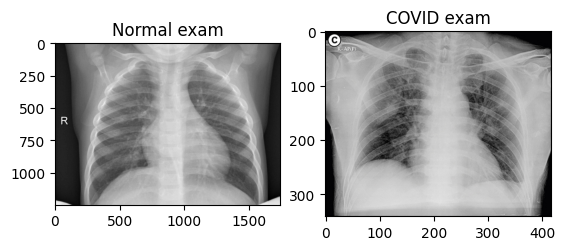

I0=((1246, 1740), <class 'numpy.ndarray'>), I1=((1246, 1740), <class 'numpy.ndarray'>)
min/max values I0=(0, 255), min/max values I1=(0, 255)


In [6]:
#train_dir = "/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train"
train_dir = "/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train"
print("Training image set:\n=======================================")
labels = (os.listdir(train_dir))
print("Label vector: ", labels)
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

#test_dir = "/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/test"
test_dir = "/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/test"
print("\nTest image set:\n=======================================")
labels = (os.listdir(test_dir))
print("Label vector: ", labels)
num_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")


I0 = train_dir + '/NORMAL/' + os.listdir(os.path.join(train_dir, 'NORMAL'))[0]
I1= train_dir + '/PNEUMONIA/' + os.listdir(os.path.join(train_dir, 'PNEUMONIA'))[0]
img_normal = plt.imread(I0)
img_pneumonia = plt.imread(I1)
plt.figure()
plt.subplot(1,2,1)
plt.title('Normal exam')
plt.imshow(img_normal, cmap='gray')
plt.subplot(1,2,2)
plt.title('COVID exam')
plt.imshow(img_pneumonia, cmap='gray')
plt.show()

print(f"I0={img_normal.shape, type(img_normal)}, I1={img_normal.shape, type(img_normal)}")
print(f"min/max values I0={np.min(img_normal), np.max(img_normal)}, min/max values I1={np.min(img_normal), np.max(img_normal)}")

##### *#1 Test with Pneumonia*

*Assigning images from the pneumonia test folder in the dataset to a variable "path," also performing the labeling of pneumonia test images and generating an image vector.*


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

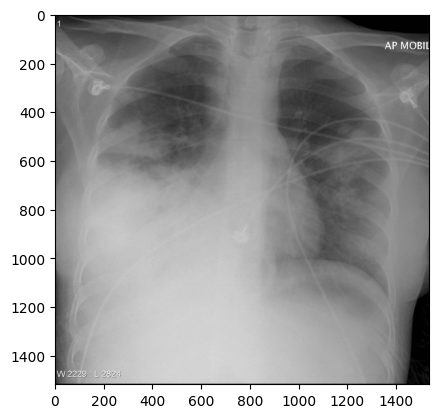

In [10]:
def read_img(img_list, img):
    n = io.imread(img, as_gray=True)
    plt.imshow(n, cmap=plt.cm.gray)
    n = img_as_ubyte(n) # verificar se é necessário, me parece que não (Caio)
    glcm = greycomatrix(n, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4]) #, levels=4)
    vetor_caract = []
    vetor_caract.append(greycoprops(glcm, 'contrast'))
    vetor_caract.append(greycoprops(glcm, 'dissimilarity'))
    vetor_caract.append(greycoprops(glcm, 'homogeneity'))
    vetor_caract.append(greycoprops(glcm, 'ASM'))
    vetor_caract.append(greycoprops(glcm, 'energy'))
    vetor_caract.append(greycoprops(glcm, 'correlation'))
    img_list.append(vetor_caract)
    test_PNEUMONIA.append(1)
    return img_list

path = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/test/PNEUMONIA/*.jpeg") #or jpeg
path1 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/test/PNEUMONIA/*.jpg") #or jpg

img_PNEUMONIA = []
test_PNEUMONIA  = []

cv_image = [read_img(img_PNEUMONIA, img) for img in path]
cv_image = [read_img(img_PNEUMONIA, img) for img in path1]



In [11]:
print("------------------------------- QUANTITY -------------------------------")
print("Quantity of values in the test image vector with pneumonia:", len(img_PNEUMONIA))
print("Quantity of values in the test label vector with pneumonia:", len(test_PNEUMONIA))
print("--------------------------------- VECTOR ---------------------------------")
print("Test label vector with pneumonia:", test_PNEUMONIA)
print("Test image vector with pneumonia:", img_PNEUMONIA)

------------------------------- QUANTITY -------------------------------
Quantity of values in the test image vector with pneumonia: 20
Quantity of values in the test label vector with pneumonia: 20
--------------------------------- VECTOR ---------------------------------
Test label vector with pneumonia: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Test image vector with pneumonia: [[array([[ 8.95612733, 16.90812313,  9.62355514, 16.84681703]]), array([[1.66548372, 2.31368444, 1.76762299, 2.32389126]]), array([[0.45418368, 0.36621744, 0.43779945, 0.36509953]]), array([[0.00139521, 0.00114193, 0.00133751, 0.00113783]]), array([[0.03735253, 0.0337925 , 0.03657194, 0.03373167]]), array([[0.99856826, 0.99729587, 0.99846128, 0.99730511]])], [array([[2.90273944, 5.28258632, 3.19785558, 5.28206773]]), array([[1.27071435, 1.75606727, 1.340595  , 1.75848991]]), array([[0.51411031, 0.41832063, 0.49705393, 0.4171413 ]]), array([[0.00097631, 0.00072368, 0.00093633, 0.00072145]]),

##### *#2 Test without Pneumonia*

*Assigning images from the non-pneumonia test folder in the dataset to a variable "path2," also performing the labeling of non-pneumonia test images and generating an image vector.*

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

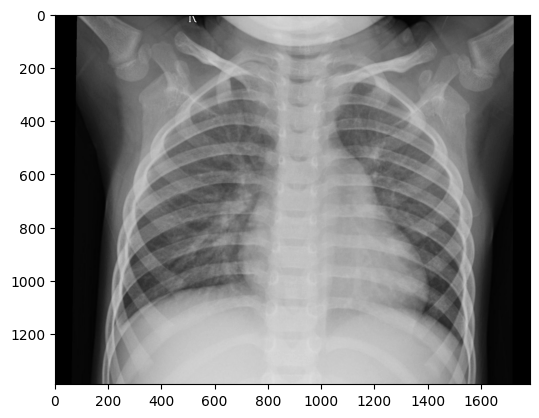

In [12]:
def read_img(img_list, img):
    n = io.imread(img, as_gray=True)
    plt.imshow(n, cmap=plt.cm.gray)
    n = img_as_ubyte(n)
    glcm = greycomatrix(n, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4]) #, levels=4)
    vetor_caract = []
    vetor_caract.append(greycoprops(glcm, 'contrast'))
    vetor_caract.append(greycoprops(glcm, 'dissimilarity'))
    vetor_caract.append(greycoprops(glcm, 'homogeneity'))
    vetor_caract.append(greycoprops(glcm, 'ASM'))
    vetor_caract.append(greycoprops(glcm, 'energy'))
    vetor_caract.append(greycoprops(glcm, 'correlation'))
    img_list.append(vetor_caract)
    test_NORMAL.append(0)
    return img_list

path2 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/test/NORMAL/*.jpeg") #or jpeg
path3 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/test/NORMAL/*.jpg") #or jpg
img_NORMAL = []
test_NORMAL  = []

cv_image = [read_img(img_NORMAL, img) for img in path2]
cv_image = [read_img(img_NORMAL, img) for img in path3]

In [15]:
print("------------------------------- QUANTITY -------------------------------")
print("Quantity of values in the test image vector without pneumonia:", len(img_NORMAL))
print("Quantity of values in the test label vector without pneumonia:", len(test_NORMAL))
print("--------------------------------- VECTOR ---------------------------------")
print("Test label vector without pneumonia:", test_NORMAL)
print("Test image vector without pneumonia:", img_NORMAL)

------------------------------- QUANTITY -------------------------------
Quantity of values in the test image vector without pneumonia: 20
Quantity of values in the test label vector without pneumonia: 20
--------------------------------- VECTOR ---------------------------------
Test label vector without pneumonia: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test image vector without pneumonia: [[array([[20.22296307, 24.45662273,  7.01304748, 25.55239053]]), array([[1.34008185, 1.83368949, 1.21972846, 1.83345513]]), array([[0.58411504, 0.49222469, 0.59008353, 0.49312527]]), array([[0.00700656, 0.00668037, 0.00733061, 0.00668206]]), array([[0.08370522, 0.08173354, 0.08561899, 0.08174386]]), array([[0.9976334 , 0.9971366 , 0.99918093, 0.99700829]])], [array([[22.64584342, 27.38772098,  7.38015458, 27.87254686]]), array([[1.69588087, 2.23626929, 1.46449586, 2.22204513]]), array([[0.52517464, 0.4500347 , 0.55270656, 0.45154818]]), array([[0.00494374, 0.00471854, 0.00547435

##### *#3 Training with Pneumonia*

*Assigning images from the pneumonia training folder in the dataset to a variable "path3," also performing the labeling of pneumonia training images and generating an image vector.*

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

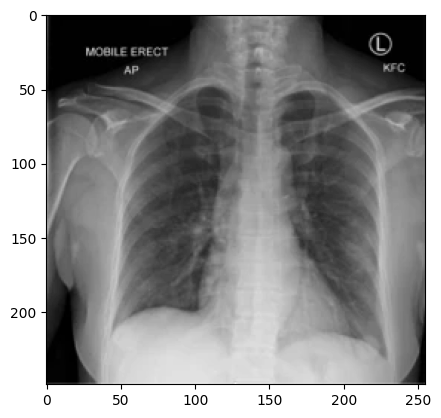

In [16]:
def read_img(img_list, img):
    n = io.imread(img, as_gray=True)
    plt.imshow(n, cmap=plt.cm.gray)
    n = img_as_ubyte(n)
    glcm = greycomatrix(n, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4]) #, levels=4)
    vetor_caract = []
    vetor_caract.append(greycoprops(glcm, 'contrast'))
    vetor_caract.append(greycoprops(glcm, 'dissimilarity'))
    vetor_caract.append(greycoprops(glcm, 'homogeneity'))
    vetor_caract.append(greycoprops(glcm, 'ASM'))
    vetor_caract.append(greycoprops(glcm, 'energy'))
    vetor_caract.append(greycoprops(glcm, 'correlation'))
    img_list.append(vetor_caract)
    train_PNEUMONIA.append(1)
    return img_list

path4 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train/PNEUMONIA/*.jpeg") #or jpeg
path5 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train/PNEUMONIA/*.jpg") #or jpg
path6 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train/PNEUMONIA/*.png") #or png

img_train_PNEUMONIA = []
train_PNEUMONIA  = []

cv_image = [read_img(img_train_PNEUMONIA, img) for img in path4]
cv_image = [read_img(img_train_PNEUMONIA, img) for img in path5]
cv_image = [read_img(img_train_PNEUMONIA, img) for img in path6]

In [18]:
print("------------------------------- QUANTITY -------------------------------")
print("Quantity of values in the training image vector with pneumonia:", len(img_train_PNEUMONIA))
print("Quantity of values in the training label vector with pneumonia:", len(train_PNEUMONIA))
print("--------------------------------- VECTOR ---------------------------------")
print("Training label vector with pneumonia:", train_PNEUMONIA)
print("Training image vector with pneumonia:", img_train_PNEUMONIA)

------------------------------- QUANTITY -------------------------------
Quantity of values in the training image vector with pneumonia: 74
Quantity of values in the training label vector with pneumonia: 74
--------------------------------- VECTOR ---------------------------------
Training label vector with pneumonia: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Training image vector with pneumonia: [[array([[24.92641814, 38.49775017, 19.94031788, 39.15921293]]), array([[2.99421989, 3.89166992, 2.93508602, 3.89405677]]), array([[0.31104765, 0.25599924, 0.31959805, 0.25658954]]), array([[0.00056175, 0.00046029, 0.00057883, 0.00046206]]), array([[0.02370136, 0.02145443, 0.02405895, 0.02149567]]), array([[0.99635404, 0.9943643 , 0.99708486, 0.99426487]])], [array([[ 6.70024999, 10.57531156,  5.85011392, 10.7625855

##### *#4 Training without Pneumonia*

*Assigning images from the non-pneumonia training folder in the dataset to a variable "path4," also performing the labeling of non-pneumonia training images and generating an image vector.*

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

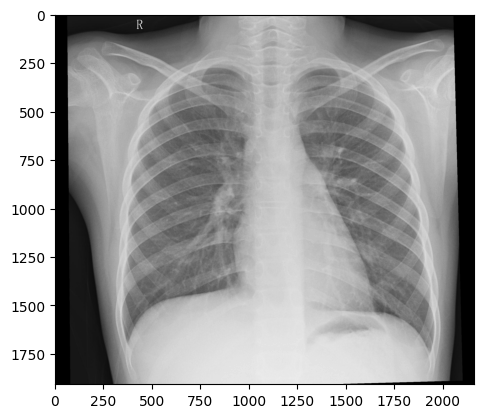

In [19]:
def read_img(img_list, img):
    n = io.imread(img, as_gray=True)
    plt.imshow(n, cmap=plt.cm.gray)
    n = img_as_ubyte(n)
    glcm = greycomatrix(n, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4]) #, levels=4)
    vetor_caract = []
    vetor_caract.append(greycoprops(glcm, 'contrast'))
    vetor_caract.append(greycoprops(glcm, 'dissimilarity'))
    vetor_caract.append(greycoprops(glcm, 'homogeneity'))
    vetor_caract.append(greycoprops(glcm, 'ASM'))
    vetor_caract.append(greycoprops(glcm, 'energy'))
    vetor_caract.append(greycoprops(glcm, 'correlation'))
    img_list.append(vetor_caract)
    train_NORMAL.append(0)
    return img_list

path7 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train/NORMAL/*.jpeg") #or jpeg
path8 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train/NORMAL/*.jpg") #or jpg
path9 = glob.glob("/content/drive/MyDrive/Colab Notebooks/xray_dataset_covid19/train/NORMAL/*.png") #or png

img_train_NORMAL = []
train_NORMAL  = []

cv_image = [read_img(img_train_NORMAL, img) for img in path7]
cv_image = [read_img(img_train_NORMAL, img) for img in path8]
cv_image = [read_img(img_train_NORMAL, img) for img in path9]


In [20]:
print("------------------------------- QUANTITY -------------------------------")
print("Quantity of values in the training image vector without pneumonia:", len(img_train_NORMAL))
print("Quantity of values in the training label vector without pneumonia:", len(train_NORMAL))
print("--------------------------------- VECTOR ---------------------------------")
print("Training label vector without pneumonia:", train_NORMAL)
print("Training image vector without pneumonia:", img_train_NORMAL)

------------------------------- QUANTITY -------------------------------
Quantity of values in the training image vector without pneumonia: 74
Quantity of values in the training label vector without pneumonia: 74
--------------------------------- VECTOR ---------------------------------
Training label vector without pneumonia: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Training image vector without pneumonia: [[array([[11.31763887, 17.35913545,  9.7708683 , 19.20820811]]), array([[1.48454629, 2.02981587, 1.41498684, 2.05116129]]), array([[0.51075823, 0.41927299, 0.53345212, 0.41736698]]), array([[0.00102276, 0.00075434, 0.00113498, 0.00074953]]), array([[0.03198055, 0.02746534, 0.0336895 , 0.0273776 ]]), array([[0.99827102, 0.99734789, 0.99850981, 0.99706515]])], [array([[29.71384719, 44.07118014, 24.25718593

##### *Summary of Created Labels*

In [21]:
print("Test label vector with pneumonia:", test_PNEUMONIA)
print("Quantity of data in the test label vector with pneumonia:", len(test_PNEUMONIA))
print("Test label vector NORMAL:", test_NORMAL)
print("Quantity of data in the test label vector NORMAL:", len(test_NORMAL))
print("Training label vector with pneumonia:", train_PNEUMONIA)
print("Quantity of data in the training label vector with pneumonia:", len(train_PNEUMONIA))
print("Training label vector NORMAL:", train_NORMAL)
print("Quantity of data in the training label vector NORMAL:", len(train_NORMAL))

Test label vector with pneumonia: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantity of data in the test label vector with pneumonia: 20
Test label vector NORMAL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Quantity of data in the test label vector NORMAL: 20
Training label vector with pneumonia: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantity of data in the training label vector with pneumonia: 74
Training label vector NORMAL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Quantity of data in the training label vector NORMAL: 74


# *Separating Vectors to Feed into the Classifier*

---

*It's important to understand that the SVC classifier will require 4 variables:*

1. y_test - *Variable responsible for storing labels of test images*
2. y_train - *Variable responsible for storing labels of training images*
3. x_train - *Variable responsible for storing data of training images*
4. x_test - *Variable responsible for storing data of test images*

*Starting with y_test.*

##### *#1 y_test*

*A loop has been created to iterate over the quantity of elements in the variable from which we want to obtain label values, and we add them to the y_test vector.*

In [22]:
y_test = []
# y_test = test_PNEUMONIA + test_NORMAL  # This line alone resolves
for k in range(len(test_PNEUMONIA)):
    y_test.append(test_PNEUMONIA[k])

print('Variable y_test with values only from the test_PNEUMONIA variable:', y_test)
print('Quantity of elements in the test_PNEUMONIA variable:', len(test_PNEUMONIA))
print('Quantity of elements in the y_test variable with values only from the test_PNEUMONIA variable:', len(y_test), "\n")

for k in range(len(test_NORMAL)):
    y_test.append(test_NORMAL[k])

print('Variable y_test with values from the test_PNEUMONIA and test_NORMAL variables:', y_test)
print('Quantity of elements in the test_NORMAL variable:', len(test_NORMAL))
print('Quantity of elements in the y_test variable with values from the test_PNEUMONIA and test_NORMAL variables:', len(y_test), "\n")

Variable y_test with values only from the test_PNEUMONIA variable: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantity of elements in the test_PNEUMONIA variable: 20
Quantity of elements in the y_test variable with values only from the test_PNEUMONIA variable: 20 

Variable y_test with values from the test_PNEUMONIA and test_NORMAL variables: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Quantity of elements in the test_NORMAL variable: 20
Quantity of elements in the y_test variable with values from the test_PNEUMONIA and test_NORMAL variables: 40 



*Consequently, the result is a y_test vector responsible for storing values of the label variables for pneumonia and non-pneumonia test images.*

In [23]:
print('Label vector y_test with positive and negative pneumonia values:', y_test)
print('Quantity of elements in the y_test vector:', len(y_test))

Label vector y_test with positive and negative pneumonia values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Quantity of elements in the y_test vector: 40


#####*#2 y_train*

*A loop has been created to iterate over the quantity of elements in the variable from which we want to obtain label values, and we add them to the y_train vector.*

In [24]:
y_train = []
# y_train = train_PNEUMONIA + train_NORMAL  # This line alone resolves

for k in range(len(train_PNEUMONIA)):
    y_train.append(train_PNEUMONIA[k])

print('Variable y_train with values only from the train_PNEUMONIA variable:', y_train)
print('Quantity of elements in the train_PNEUMONIA variable:', len(train_PNEUMONIA))
print('Quantity of elements only with the train_PNEUMONIA variable:', len(y_train), "\n")

for k in range(len(train_NORMAL)):
    y_train.append(train_NORMAL[k])

print('Variable y_train with values from the train_PNEUMONIA and train_NORMAL variables:', y_train)
print('Quantity of elements in the train_NORMAL variable:', len(train_NORMAL))
print('Quantity of elements in the y_train variable with values from the train_PNEUMONIA and train_NORMAL variables:', len(y_train))


Variable y_train with values only from the train_PNEUMONIA variable: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantity of elements in the train_PNEUMONIA variable: 74
Quantity of elements only with the train_PNEUMONIA variable: 74 

Variable y_train with values from the train_PNEUMONIA and train_NORMAL variables: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Quantity of elements in the train_NORMAL variable: 74
Quan

*Consequently, the result is a y_train vector responsible for storing values of the label variables for training images with pneumonia and without pneumonia.*

In [25]:
print('Training label variable with positive and negative pneumonia values:', y_train)
print('Quantity of training elements:', len(y_train))


Training label variable with positive and negative pneumonia values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Quantity of training elements: 148


#####*#3 x_train*

*A loop has been created to iterate over the quantity of elements in the variable from which we want to obtain label values (perhaps attributes), and we add them to the x_train vector.*

In [28]:
x_train = []

aux = []
m = 0
l = 0
n = 0
k = 0
g = 0
def add_value(array, g):
   aux = []
   for l in range(6):
     for n in range(4):
      aux.append(array[g][l][m][n])
   return aux

for g in range(74):
   x_train.append(add_value(img_train_PNEUMONIA, g))


print('Quantity of elements in the img_train_PNEUMONIA variable:', len(img_train_PNEUMONIA))
print('Quantity of elements only with data from the img_train_PNEUMONIA variable:', len(x_train),"\n")

for g in range(74):
   x_train.append(add_value(img_train_NORMAL, g))


print('Quantity of elements in the img_train_NORMAL variable:', len(img_train_NORMAL))
print('Quantity of elements in the x_train variable with data from the img_train_PNEUMONIA and img_train_NORMAL variables:', len(x_train))


Quantity of elements in the img_train_PNEUMONIA variable: 74
Quantity of elements only with data from the img_train_PNEUMONIA variable: 74 

Quantity of elements in the img_train_NORMAL variable: 74
Quantity of elements in the x_train variable with data from the img_train_PNEUMONIA and img_train_NORMAL variables: 148


*Consequently, the result is an x_train vector responsible for storing values of the data variables for training images with pneumonia and without pneumonia.*

In [29]:
print('Quantity of data elements in the x_train variable:', len(x_train))
print('Variable for training images data, with positive and negative pneumonia values:', x_train)

Quantity of data elements in the x_train variable: 148
Variable for training images data, with positive and negative pneumonia values: [[24.92641814386602, 38.49775017497421, 19.940317882817624, 39.15921292702178, 2.994219892729953, 3.8916699150187117, 2.9350860159923107, 3.8940567713673047, 0.3110476532364833, 0.2559992448019286, 0.3195980452492748, 0.25658953582250044, 0.0005617545286292973, 0.0004602926171461163, 0.0005788329352044359, 0.0004620638528444358, 0.02370136132439015, 0.02145443117740753, 0.024058947092598128, 0.021495670560474165, 0.9963540375457218, 0.9943643006448255, 0.99708485829031, 0.9942648683620962], [6.700249987589218, 10.575311559643396, 5.850113923009019, 10.762585519218684, 1.7471356031970064, 2.2802908363140757, 1.7764377991720346, 2.305254286606472, 0.4250115346732206, 0.35302676235109925, 0.4201026471824343, 0.3510018981561995, 0.0009408507371129585, 0.0007354112864944916, 0.000930919433781024, 0.0007275240700549356, 0.030673290288343025, 0.027118467628066

#####*#4 x_test*

*A loop has been created to iterate over the quantity of elements in the variable from which we want to obtain label values, and we add them to the x_test vector.*

In [30]:
len(img_NORMAL)

20

In [31]:
x_test = []

aux = []
m = 0
l = 0
n = 0
k = 0
g = 0
def add_value(array, g):
   aux = []
   for l in range(6):
     for n in range(4):
       aux.append(array[g][l][m][n])
   return aux

for g in range(20):
   x_test.append(add_value(img_PNEUMONIA, g))

print('Quantity of elements in the img_PNEUMONIA variable:', len(img_PNEUMONIA))
print('Quantity of elements only with data from the img_PNEUMONIA variable:', len(x_test),"\n")

for g in range(20):
   x_test.append(add_value(img_NORMAL, g))

print('Quantity of elements in the img_NORMAL variable:', len(img_NORMAL))
print('Quantity of elements in the x_test variable with data from the img_PNEUMONIA and img_NORMAL variables:', len(x_test))


Quantity of elements in the img_PNEUMONIA variable: 20
Quantity of elements only with data from the img_PNEUMONIA variable: 20 

Quantity of elements in the img_NORMAL variable: 20
Quantity of elements in the x_test variable with data from the img_PNEUMONIA and img_NORMAL variables: 40


*Consequently, the result is an x_test vector responsible for storing values of the data variables for test images with pneumonia and without pneumonia.*

In [32]:
print('Quantity of data elements in the x_test variable:', len(x_test))
print('Variable for test images data, with positive and negative pneumonia values:', x_test)


Quantity of data elements in the x_test variable: 40
Variable for test images data, with positive and negative pneumonia values: [[8.95612733258655, 16.908123127739888, 9.62355514201579, 16.846817033637308, 1.6654837151461066, 2.3136844364049423, 1.7676229850783158, 2.323891263831878, 0.45418367517913183, 0.3662174441544916, 0.43779945039404805, 0.3650995262144735, 0.0013952115974644713, 0.0011419331764675538, 0.0013375069877668549, 0.0011378256546309652, 0.03735253133944835, 0.03379250177876083, 0.03657194263047637, 0.033731671388043685, 0.99856825727511, 0.9972958715454583, 0.9984612823561894, 0.99730511178206], [2.902739439855261, 5.282586315211287, 3.1978555774709716, 5.28206772774268, 1.2707143478016383, 1.756067272379745, 1.3405950032873126, 1.7584899054518872, 0.5141103082465966, 0.4183206269685525, 0.4970539289537573, 0.4171412982086375, 0.0009763076064095919, 0.0007236837041526677, 0.0009363334482655398, 0.0007214541693141754, 0.031245921436398573, 0.026901369930779878, 0.0305

##### *Result*

In [33]:
print('---------------------------------- IMAGES -------------------------------------------------------')
print('Training data variable with positive and negative pneumonia values:', x_train)
print('Quantity of training data images:', len(x_train))
print('------------------------------------------------------------------------------------------')
print('Test data variable with positive and negative pneumonia values:', x_test)
print('Quantity of test data images:', len(x_test))

print('---------------------------------- LABEL -------------------------------------------------------')
print('Training label variable with positive and negative pneumonia values:', y_train)
print('Quantity of training labels:', len(y_train))
print('------------------------------------------------------------------------------------------')
print('Test label variable with positive and negative pneumonia values:', y_test)
print('Quantity of test labels:', len(y_test))


---------------------------------- IMAGES -------------------------------------------------------
Training data variable with positive and negative pneumonia values: [[24.92641814386602, 38.49775017497421, 19.940317882817624, 39.15921292702178, 2.994219892729953, 3.8916699150187117, 2.9350860159923107, 3.8940567713673047, 0.3110476532364833, 0.2559992448019286, 0.3195980452492748, 0.25658953582250044, 0.0005617545286292973, 0.0004602926171461163, 0.0005788329352044359, 0.0004620638528444358, 0.02370136132439015, 0.02145443117740753, 0.024058947092598128, 0.021495670560474165, 0.9963540375457218, 0.9943643006448255, 0.99708485829031, 0.9942648683620962], [6.700249987589218, 10.575311559643396, 5.850113923009019, 10.762585519218684, 1.7471356031970064, 2.2802908363140757, 1.7764377991720346, 2.305254286606472, 0.4250115346732206, 0.35302676235109925, 0.4201026471824343, 0.3510018981561995, 0.0009408507371129585, 0.0007354112864944916, 0.000930919433781024, 0.0007275240700549356, 0.030673

# *Classifier*

---

*The classifier we will use is the SVC, so we will import some libraries for its use.*

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

*It is important to remember the quantity of data we are working with.*

In [35]:
print('Dimension of the original set:', len(y_train) + len(y_test))
print('Dimension of the training subset:', len(x_train), len(y_train))
print('Dimension of the test subset:', len(x_test), len(y_test))

Dimension of the original set: 188
Dimension of the training subset: 148 148
Dimension of the test subset: 40 40


*Now we will pass our variables x_train and y_train for the training of the classifier.*

In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)     # escala(normaliza) os dados para média zero e varianaça um
x_test = scaler.transform(x_test)           # normaliza conjunto de teste com os mesmos parâmetros
print(x_test.shape)
clf = SVC()
modelo = clf.fit(x_train, y_train)

(40, 24)


*Testing the model.*

In [37]:
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy percentage:', accuracy * 100, '%')


Accuracy percentage: 82.5 %


In [38]:
unknown_instance = [19]
predicted_label_numeric = y_pred[unknown_instance]

print('Numeric label of the unknown instance:', predicted_label_numeric)
print('Semantic label of the unknown instance:', labels[int(predicted_label_numeric)])


Numeric label of the unknown instance: [1]
Semantic label of the unknown instance: PNEUMONIA


*Evaluating the Model.*

Confusion Matrix:
[[16  4]
 [ 3 17]]


[Text(0, 0.5, 'NORMAL'), Text(0, 1.5, 'PNEUMONIA')]

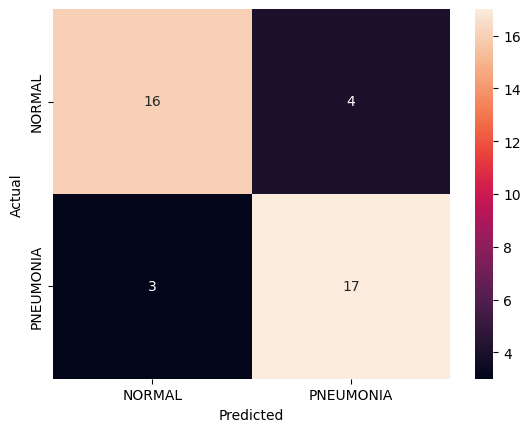

In [39]:
M = confusion_matrix(y_test, y_pred)
import seaborn as sns

print('Confusion Matrix:')
print(M)

tick_labels = ['NORMAL', 'PNEUMONIA']
predicted_vals = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)


*Tuning Model Parameters to Achieve Better Results*
- Tuning the Kernel parameter

In [40]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    print(i)
    clf = SVC(kernel=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    M = confusion_matrix(y_test, y_pred)
    print('Accuracy percentage:', accuracy * 100, '%')
    print('Confusion Matrix:')
    print(M)
    labels = ['NORMAL', 'Covid-19']
    print(classification_report(y_test, y_pred, target_names=labels))
    print('------------------------------------------')

linear
Accuracy percentage: 55.00000000000001 %
Confusion Matrix:
[[11  9]
 [ 9 11]]
              precision    recall  f1-score   support

      NORMAL       0.55      0.55      0.55        20
    Covid-19       0.55      0.55      0.55        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40

------------------------------------------
poly
Accuracy percentage: 50.0 %
Confusion Matrix:
[[14  6]
 [14  6]]
              precision    recall  f1-score   support

      NORMAL       0.50      0.70      0.58        20
    Covid-19       0.50      0.30      0.37        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.48        40
weighted avg       0.50      0.50      0.48        40

------------------------------------------
rbf
Accuracy percentage: 82.5 %
Confusion Matrix:
[[16  4]
 [ 3 17]]
              precision    recall  f